In [ ]:
   
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


test.csv
train.csv



In [2]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(42000, 784), dtype=float32)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9], shape=(42000,), dtype=int32)

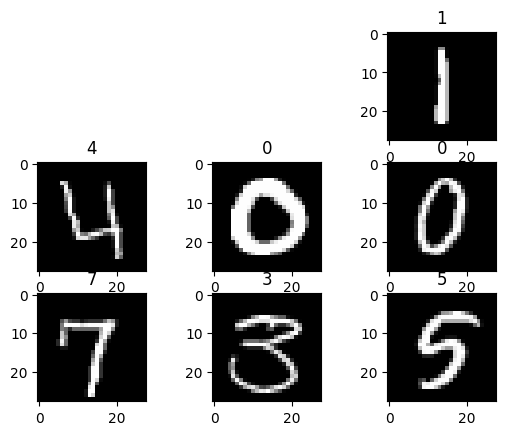

In [8]:
## Data Visualization
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(2, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [9]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [11]:
#Preprocessing the digit images
#Feature Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [12]:
"""One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension. 
For example, 3 would be [0,0,0,1,0,0,0,0,0,0]."""
from tensorflow.keras.utils import to_categorical

y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

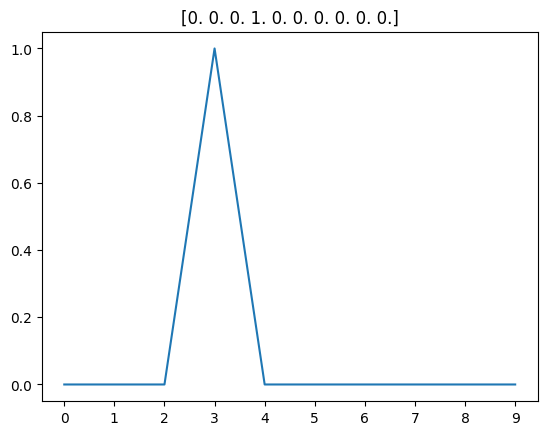

In [13]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [14]:
#Designing Neural Network Architecture
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [15]:
#Linear Model
from keras.models import  Sequential
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [16]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator()


In [19]:
## Cross Validation 
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [20]:
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8641 - loss: 0.4535 - val_accuracy: 0.9005 - val_loss: 0.3330
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9123 - loss: 0.3037 - val_accuracy: 0.9036 - val_loss: 0.3205
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9194 - loss: 0.2869 - val_accuracy: 0.9164 - val_loss: 0.2973


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

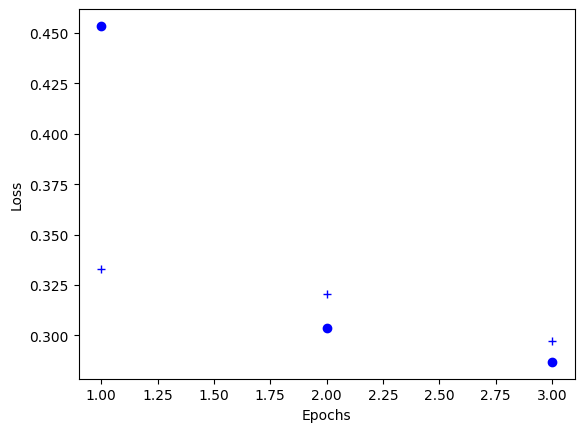

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

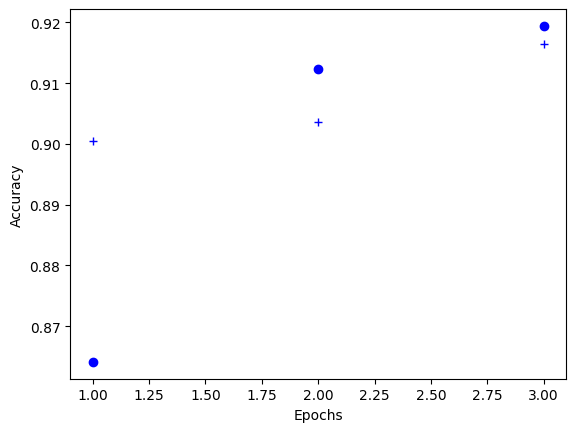

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [24]:
"""Fully Connected Model
Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. 
Adding another Dense Layer to model."""
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [26]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [27]:
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - loss: 0.2636 - val_accuracy: 0.9181 - val_loss: 0.2951
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9285 - loss: 0.2595 - val_accuracy: 0.9107 - val_loss: 0.3089
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9281 - loss: 0.2572 - val_accuracy: 0.9133 - val_loss: 0.3027


In [28]:
## Convolutional Neural Network
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
model= get_cnn_model()
model.optimizer.lr=0.01

In [30]:
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9580 - loss: 0.1385 - val_accuracy: 0.9771 - val_loss: 0.0722
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.9895 - val_loss: 0.0375
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9881 - val_loss: 0.0432


In [31]:
## Data Augmentation
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [32]:
model.optimizer.lr=0.001
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.9788 - loss: 0.0676 - val_accuracy: 0.9769 - val_loss: 0.0733
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9860 - val_loss: 0.0429
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9891 - loss: 0.0356 - val_accuracy: 0.9902 - val_loss: 0.0295


In [33]:
"""Adding Batch Normalization
it helps to fine tune hyperparameters more better and train really deep neural networks.
from tensorflow.keras.layers import BatchNormalization"""


def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
model= get_bn_model()
model.optimizer.lr=0.01
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9489 - loss: 0.1637 - val_accuracy: 0.9748 - val_loss: 0.0850
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.9794 - loss: 0.0652 - val_accuracy: 0.9867 - val_loss: 0.0520
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9840 - loss: 0.0504 - val_accuracy: 0.9886 - val_loss: 0.0354


In [35]:
model.optimizer.lr=0.01
datagen = ImageDataGenerator()

batches = gen.flow(X, y, batch_size=64)
history = model.fit(
    batches,
    steps_per_epoch=len(batches),
    epochs=3,
    validation_data=val_batches,
    validation_steps=len(val_batches)
)

Epoch 1/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.9859 - loss: 0.0471 - val_accuracy: 0.9907 - val_loss: 0.0297
Epoch 2/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.9886 - val_loss: 0.0342
Epoch 3/3
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9878 - loss: 0.0379 - val_accuracy: 0.9914 - val_loss: 0.0246


In [37]:
import numpy as np
import pandas as pd

# Get predictions (returns probabilities)
predictions_proba = model.predict(X_test, verbose=0)

# Convert to class labels (highest probability class)
predictions = np.argmax(predictions_proba, axis=1)

# Create submission DataFrame
submissions = pd.DataFrame({
    "ImageId": list(range(1, len(predictions) + 1)),
    "Label": predictions
})
submissions.to_csv("output.csv", index=False, header=True)
